##Data Collection :
We have a souce of data to collect i.e from kaggle - https://www.kaggle.com/datasets/dubradave/hospital-readmissions

##Data Loading :

We can download directly using kaggle api or download and upload the dataset in the notebook.

In [249]:
import kagglehub
import os

In [250]:
path = kagglehub.dataset_download("dubradave/hospital-readmissions")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 617kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dubradave/hospital-readmissions/versions/1


In [251]:
csv_file_path = os.path.join(path, 'hospital_readmissions.csv')

##Data Understanding :

we can use Pandas to understand the data.

In [252]:
import pandas as pd

In [253]:
data = pd.read_csv(csv_file_path)

In [254]:
data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


Check for Duplicates

In [255]:
any_duplicates = data.duplicated().any()
if any_duplicates:
    print("The DataFrame contains duplicate rows.")
else:
    print("The DataFrame does not contain any duplicate rows.")

The DataFrame does not contain any duplicate rows.


Check for Missing Values

In [256]:
missing_counts = data.isnull().sum()
print(missing_counts)

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


Check for Outliers

In [257]:
data.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


box plots for n_emergency, n_outpatient, and n_medications

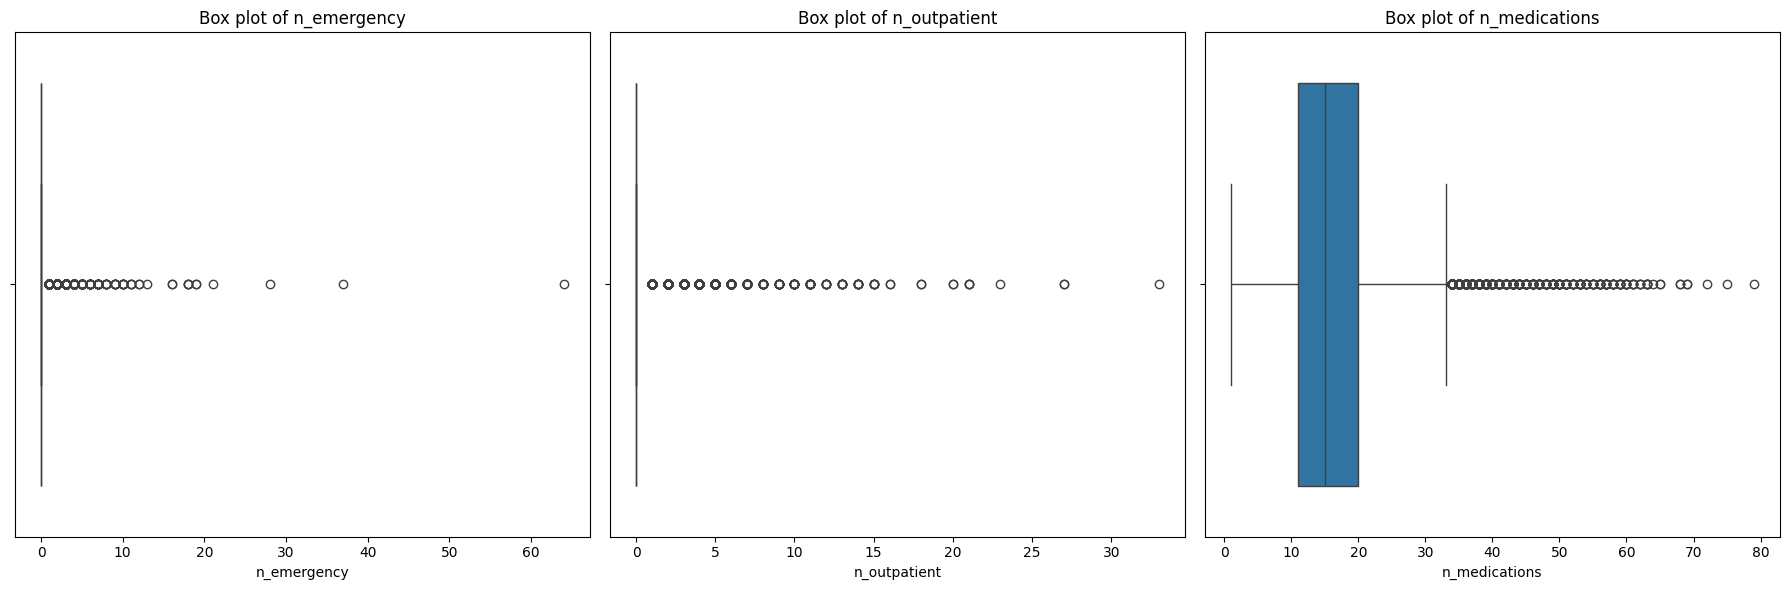

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=data['n_emergency'], ax=axes[0])
axes[0].set_title('Box plot of n_emergency')

sns.boxplot(x=data['n_outpatient'], ax=axes[1])
axes[1].set_title('Box plot of n_outpatient')

sns.boxplot(x=data['n_medications'], ax=axes[2])
axes[2].set_title('Box plot of n_medications')

plt.tight_layout()
plt.show()

Strong Evidence of the outliers existence.
So Removing them could delete a lot of rows which could give us a a loss of much informational data.Instead We must use another Outlier handling method called Log Transformation.

In [259]:
import numpy as np

#columns to transform
cols_to_transform = ['n_emergency', 'n_outpatient', 'n_medications']

#apply log transformation
for col in cols_to_transform:
  # np.log1p(x) calculates log(x + 1),
  data[f'{col}_log'] = np.log1p(data[col])


Since We have successfully log the columns we need to remove the original columns.

In [260]:
data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,n_emergency_log,n_outpatient_log,n_medications_log
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,0.0,1.098612,2.944439
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,0.0,0.000000,2.639057
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,0.0,0.000000,2.944439
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,0.0,0.693147,2.564949
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,0.0,0.000000,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes,0.0,0.000000,3.433987
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes,0.0,0.000000,3.218876
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes,0.0,0.000000,1.945910
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no,0.0,0.000000,2.772589


In [261]:
df = data.drop(columns=['n_emergency', 'n_outpatient', 'n_medications'],axis=1)

In [262]:
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_inpatient,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,n_emergency_log,n_outpatient_log,n_medications_log
0,[70-80),8,72,1,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,0.0,1.098612,2.944439
1,[70-80),3,34,2,0,Other,Other,Other,Other,no,no,no,yes,no,0.0,0.000000,2.639057
2,[50-60),5,45,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,0.0,0.000000,2.944439
3,[70-80),2,36,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,0.0,0.693147,2.564949
4,[60-70),1,42,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,0.0,0.000000,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes,0.0,0.000000,3.433987
24996,[80-90),2,66,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes,0.0,0.000000,3.218876
24997,[70-80),5,12,0,1,Missing,Other,Other,Other,normal,no,no,no,yes,0.0,0.000000,1.945910
24998,[70-80),2,61,3,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no,0.0,0.000000,2.772589


Now df is the new Dataset which is ready for further preprocessing

List Categorical columns


In [263]:
categorical_cols = df.select_dtypes(include='object').columns

In [264]:
print(categorical_cols)

Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


We need to Encode these columns using Label Encoder But before that we need to know what are the each features unique classes

In [265]:
for col in categorical_cols:
  unique_values = df[col].unique()
  print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'age': ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
Unique values in column 'medical_specialty': ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
Unique values in column 'diag_1': ['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
Unique values in column 'diag_2': ['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
Unique values in column 'diag_3': ['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
Unique values in column 'glucose_test': ['no' 'normal' 'high']
Unique values in column 'A1Ctest': ['no' 'normal' 'high']
Unique values in column 'change': ['no' 'yes']
Unique values in column 'diabetes_med': ['yes' 'no']
Unique values in column 'readmitted': ['no' 'yes']


Columns like age, glucose_test, and A1Ctest have a natural order. The best method here is Label Encoding with a custom-defined map to preserve that order.

In [266]:
age_map = {
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
df['age_encoded'] = df['age'].map(age_map)

# Create a mapping for the glucose/A1C tests
test_map = {'no': 0, 'normal': 1, 'high': 2}
df['A1Ctest_encoded'] = df['A1Ctest'].map(test_map)
df['glucose_test_encoded'] = df['glucose_test'].map(test_map)

For binary features we can just use map

In [267]:
binary_map = {'no': 0, 'yes': 1}

df['change_encoded'] = df['change'].map(binary_map)
df['diabetes_med_encoded'] = df['diabetes_med'].map(binary_map)

df['readmitted_encoded'] = df['readmitted'].map(binary_map)

For other fields which requires no order and any preferences we can use one-hot encoding

In [268]:
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_inpatient,medical_specialty,diag_1,diag_2,diag_3,glucose_test,...,readmitted,n_emergency_log,n_outpatient_log,n_medications_log,age_encoded,A1Ctest_encoded,glucose_test_encoded,change_encoded,diabetes_med_encoded,readmitted_encoded
0,[70-80),8,72,1,0,Missing,Circulatory,Respiratory,Other,no,...,no,0.0,1.098612,2.944439,75,0,0,0,1,0
1,[70-80),3,34,2,0,Other,Other,Other,Other,no,...,no,0.0,0.000000,2.639057,75,0,0,0,1,0
2,[50-60),5,45,0,0,Missing,Circulatory,Circulatory,Circulatory,no,...,yes,0.0,0.000000,2.944439,55,0,0,1,1,1
3,[70-80),2,36,0,0,Missing,Circulatory,Other,Diabetes,no,...,yes,0.0,0.693147,2.564949,75,0,0,1,1,1
4,[60-70),1,42,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,...,no,0.0,0.000000,2.079442,65,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,0,Missing,Circulatory,Other,Circulatory,no,...,yes,0.0,0.000000,3.433987,85,1,0,0,0,1
24996,[80-90),2,66,0,0,Missing,Digestive,Injury,Other,no,...,yes,0.0,0.000000,3.218876,85,2,0,1,1,1
24997,[70-80),5,12,0,1,Missing,Other,Other,Other,normal,...,yes,0.0,0.000000,1.945910,75,0,1,0,0,1
24998,[70-80),2,61,3,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,...,no,0.0,0.000000,2.772589,75,0,0,1,1,0


In [269]:
nominal_cols = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']

# Apply one-hot encoding
df_final = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Now, drop the original columns that have been encoded
cols_to_drop = [
    'age', 'glucose_test', 'A1Ctest', 'change',
    'diabetes_med', 'readmitted'
]
df_processed = df_final.drop(columns=cols_to_drop)


In [270]:
df_processed

,time_in_hospital,n_lab_procedures,n_procedures,n_inpatient,n_emergency_log,n_outpatient_log,n_medications_log,age_encoded,A1Ctest_encoded,glucose_test_encoded,...,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,8,72,1,0,0.0,1.098612,2.944439,75,0,0,...,False,False,True,False,False,False,False,False,True,False
1,3,34,2,0,0.0,0.000000,2.639057,75,0,0,...,False,True,False,False,False,False,False,False,True,False
2,5,45,0,0,0.0,0.000000,2.944439,55,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2,36,0,0,0.0,0.693147,2.564949,75,0,0,...,False,True,False,True,False,False,False,False,False,False
4,1,42,0,0,0.0,0.000000,2.079442,65,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,0,0.0,0.000000,3.433987,85,1,0,...,False,True,False,False,False,False,False,False,False,False
24996,2,66,0,0,0.0,0.000000,3.218876,85,2,0,...,False,False,False,False,False,False,False,False,True,False
24997,5,12,0,1,0.0,0.000000,1.945910,75,0,1,...,False,True,False,False,False,False,False,False,True,False
24998,2,61,3,0,0.0,0.000000,2.772589,75,0,0,...,False,False,False,False,False,False,False,False,True,False


In [271]:
df_processed.columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_inpatient',
       'n_emergency_log', 'n_outpatient_log', 'n_medications_log',
       'age_encoded', 'A1Ctest_encoded', 'glucose_test_encoded',
       'change_encoded', 'diabetes_med_encoded', 'readmitted_encoded',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_InternalMedicine', 'medical_specialty_Missing',
       'medical_specialty_Other', 'medical_specialty_Surgery',
       'diag_1_Diabetes', 'diag_1_Digestive', 'diag_1_Injury',
       'diag_1_Missing', 'diag_1_Musculoskeletal', 'diag_1_Other',
       'diag_1_Respiratory', 'diag_2_Diabetes', 'diag_2_Digestive',
       'diag_2_Injury', 'diag_2_Missing', 'diag_2_Musculoskeletal',
       'diag_2_Other', 'diag_2_Respiratory', 'diag_3_Diabetes',
       'diag_3_Digestive', 'diag_3_Injury', 'diag_3_Missing',
       'diag_3_Musculoskeletal', 'diag_3_Other', 'diag_3_Respiratory'],
      dtype='object')

In [272]:
df_processed.dtypes

,0
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_inpatient,int64
n_emergency_log,float64
n_outpatient_log,float64
n_medications_log,float64
age_encoded,int64
A1Ctest_encoded,int64
glucose_test_encoded,int64


Now all the Features are processed and lets check whether they are balanced or not

Raw count of each class:
readmitted_encoded
0    13246
1    11754
Name: count, dtype: int64

Percentage of each class:
readmitted_encoded
0    0.52984
1    0.47016
Name: proportion, dtype: float64


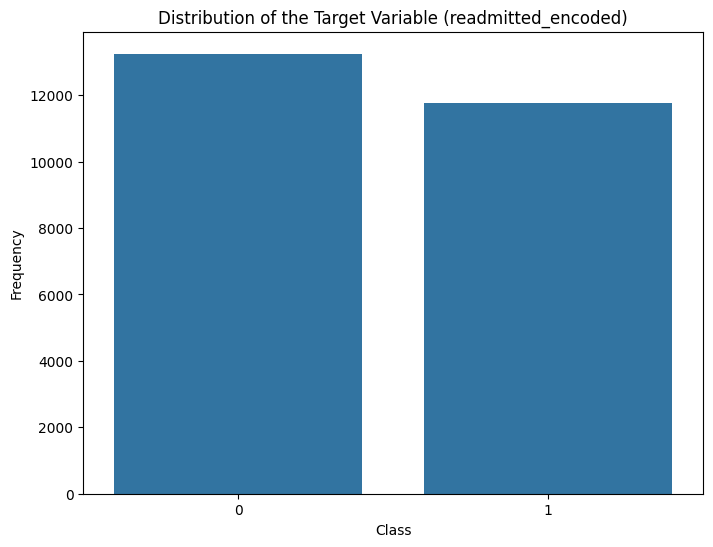

In [273]:

# Replace 'df_processed' with your DataFrame name and
# 'readmitted_encoded' with your actual target column name.
target_column = 'readmitted_encoded'
df = df_processed

# 1. Print the raw counts and percentages of each class
print("Raw count of each class:")
print(df[target_column].value_counts())
print("\nPercentage of each class:")
print(df[target_column].value_counts(normalize=True))

# 2. Create a count plot to visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title(f'Distribution of the Target Variable ({target_column})')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

It is close to 50:50 balanced data So we can proceed to go for training the model

the dataset df_processed is all set to be a dataset for the training model

##Model Development

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [275]:
# Split features and target
X = df_processed.drop("readmitted_encoded", axis=1)
y = df_processed["readmitted_encoded"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# List of models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, max_depth=6, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
    else:
        print("ROC AUC: Not available")


Decision Tree:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      3974
           1       0.59      0.52      0.55      3526

    accuracy                           0.61      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.60      0.61      0.60      7500

ROC AUC: 0.6308118838816458

Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      3974
           1       0.60      0.54      0.57      3526

    accuracy                           0.62      7500
   macro avg       0.62      0.61      0.61      7500
weighted avg       0.62      0.62      0.62      7500

ROC AUC: 0.6539167235927461


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:19:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      3974
           1       0.57      0.52      0.55      3526

    accuracy                           0.59      7500
   macro avg       0.59      0.59      0.59      7500
weighted avg       0.59      0.59      0.59      7500

ROC AUC: 0.6215586008430865

Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.70      0.66      3974
           1       0.60      0.50      0.55      3526

    accuracy                           0.61      7500
   macro avg       0.61      0.60      0.60      7500
weighted avg       0.61      0.61      0.60      7500

ROC AUC: 0.6468485884283007

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66      3974
           1       0.61      0.52      0.56      3526

    accuracy                           0.62      7500
   macro avg       0

Based on the metrics Random Forest model is the best performer.

Lets Save the model

In [276]:
import joblib

# Save the model
joblib.dump(models['Random Forest'], 'rf_model2.pkl')

# Load the model later
Random_Forest_model = joblib.load('rf_model2.pkl')
# now you can use loaded_model.predict()

In [277]:

feature_columns = df_processed.drop("readmitted_encoded", axis=1).columns
np.save("train_columns.npy", feature_columns)

#Prediction Pipeline
import joblib
import pandas as pd

# Load model and training column structure
model = joblib.load("rf_model.pkl")
train_cols = np.load("train_columns.npy", allow_pickle=True)

# Preprocessing helper
age_map = {
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
    '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
test_map = {'no': 0, 'normal': 1, 'high': 2}
binary_map = {'no': 0, 'yes': 1}
log_cols = ['n_emergency', 'n_outpatient', 'n_medications']
nominal_cols = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']
numeric_cols = ['time_in_hospital', 'n_procedures', 'n_lab_procedures']
def preprocess_input(input_dict: dict) -> pd.DataFrame:
    df = pd.DataFrame([input_dict])

    # 1. Log transform numeric outlier columns
    for col in log_cols:
        df[f'{col}_log'] = np.log1p(df[col])
        df.drop(columns=[col], inplace=True)

    # 2. Encode ordered categorical columns
    df['age_encoded'] = df['age'].map(age_map)
    df['A1Ctest_encoded'] = df['A1Ctest'].map(test_map)
    df['glucose_test_encoded'] = df['glucose_test'].map(test_map)

    # 3. Encode binary columns
    df['change_encoded'] = df['change'].map(binary_map)
    df['diabetes_med_encoded'] = df['diabetes_med'].map(binary_map)

    # 4. One-hot encode nominal columns
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

    # 5. Drop original raw columns
    df.drop(columns=['age','A1Ctest','glucose_test','change','diabetes_med'], inplace=True)

    # 6. Align with training columns
    for col in train_cols:
        if col not in df.columns:
            df[col] = 0
    df = df[train_cols]

    return df


def predict_new_patient(input_dict: dict):
    """
    Takes raw input as dict and returns prediction (0/1) and probability.
    """
    X = preprocess_input(input_dict)
    pred = model.predict(X)[0]
    proba = model.predict_proba(X)[0][1]
    return pred, proba


In [278]:
sample_input = {
    'time_in_hospital': 7,
    'n_procedures': 3,
    'n_lab_procedures': 45,
    'n_emergency': 2,
    'n_outpatient': 5,
    'n_medications': 10,
    'age': '[60-70)',
    'A1Ctest': 'high',
    'glucose_test': 'normal',
    'change': 'yes',
    'diabetes_med': 'yes',
    'medical_specialty': 'cardiology',
    'diag_1': '250',
    'diag_2': '401',
    'diag_3': '428'
}

pred, proba = predict_new_patient(sample_input)
print("Prediction:", "Readmitted" if pred == 1 else "Not Readmitted")
print("Probability of readmission:", ((round(proba,3)) * 100))


Prediction: Readmitted
Probability of readmission: 64.3
